In [67]:
import pandas

df = pandas.read_csv("data-by-day.csv")
df

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,10/21/2022,1525,395,113,14,0,1544,2016,111,12,...,13,0,0,104,43,146,9,1,1,60910
966,10/22/2022,1108,325,114,10,0,1556,2024,114,12,...,11,1,0,106,41,147,10,1,1,60910
967,10/23/2022,1065,442,97,12,1,1568,2041,116,13,...,8,1,0,103,40,143,10,1,1,60910
968,10/24/2022,2228,669,38,18,2,1595,2079,107,13,...,3,6,0,101,36,138,9,1,2,60910


# Decision Tree Regression

In [68]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


def checkRange(predItem, realItem, rangeSize):
    if predItem - rangeSize <= realItem and predItem + rangeSize >= realItem:
        return True
    return False

def comparePred(pred, testY, rangeSize):
    truePredict = 0
    for i in range(len(pred)):
        if checkRange(pred[i], testY[i], rangeSize):
            truePredict += 1
    return truePredict / len(pred)

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

features = ["CASE_COUNT", "PROBABLE_CASE_COUNT", "HOSPITALIZED_COUNT"]
X = df[features]
Y = df["DEATH_COUNT"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state=7)

# fit the regressor with X and Y data
regressor.fit(trainX, trainY)

pred = regressor.predict(testX)

# print(score(pred, testY))
comparePred(pred, list(testY), 5)



0.5498281786941581

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Mean Squre Error
MSE = mean_squared_error(testY, pred)
print("MSE:  ", MSE)

# Average Mean Sqare Error
RMSE = MSE ** 0.5
print("RMSE:  ", RMSE)

# mean_absolute_error
MAE = mean_absolute_error(testY, pred)
print("MAE:  ", MAE)

# r2_score
r2 = r2_score(testY, pred)
print("r2:  ", r2)

MSE:   552.4707903780069
RMSE:   23.504697198177364
MAE:   11.219931271477662
r2:   0.8825873378629611


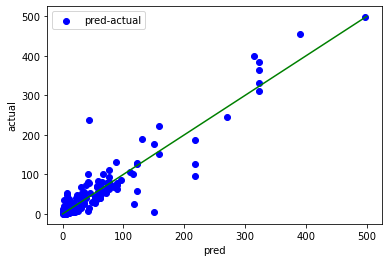

In [92]:
plt.figure()
plt.scatter(pred, testY, c="blue", label="pred-actual")

plt.plot([0, 500], [0, 500], color="green")
plt.xlabel("pred")
plt.ylabel("actual")
plt.legend()
plt.show()